In [2]:
import sys
sys.setrecursionlimit(100000)
from XY2D import *

import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

#want to make my plots look a bit better...
mpl.rcParams['axes.linewidth'] = 1.5 #set the value globally
plt.rcParams["font.family"] = "serif"
plt.rcParams["mathtext.fontset"] = "dejavuserif"

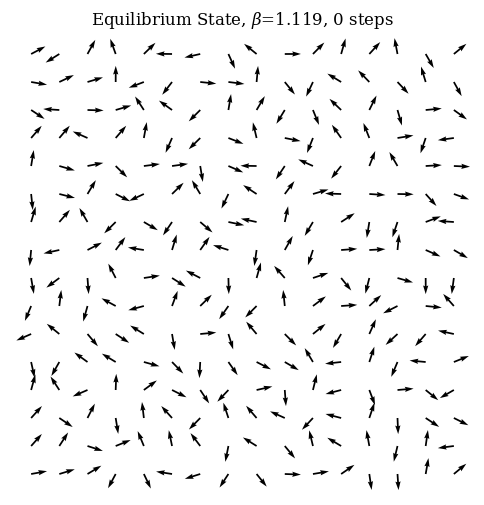

In [125]:
lattice = XY2D(L=16, beta=1.119)
lattice.show()

In [4]:
#mag = []
max_steps = 6000
lattices128 = {}

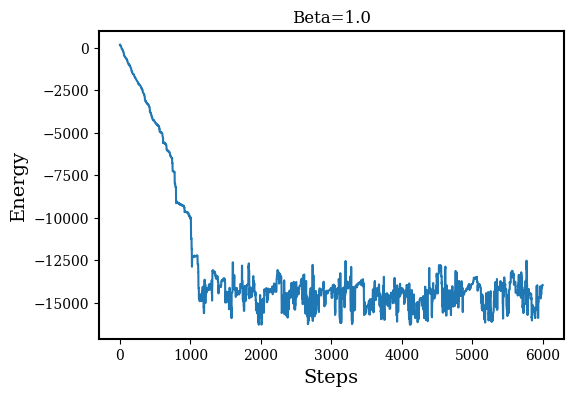

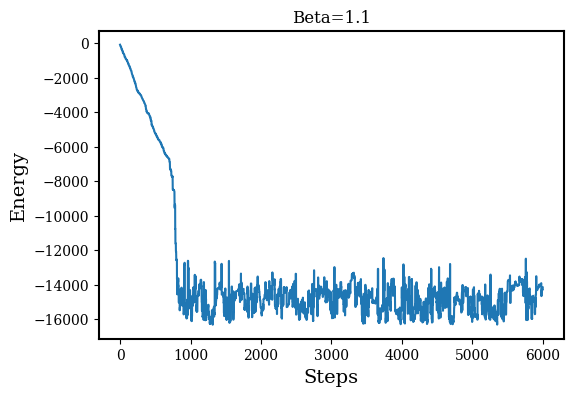

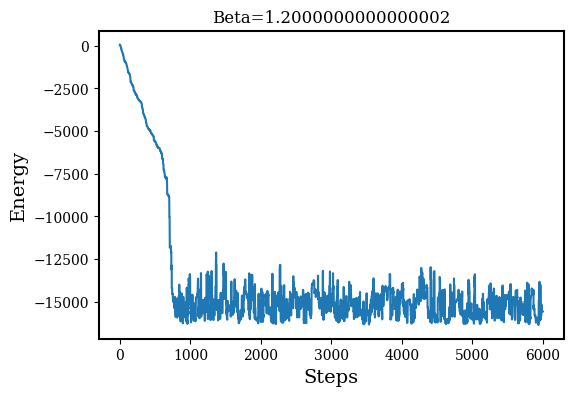

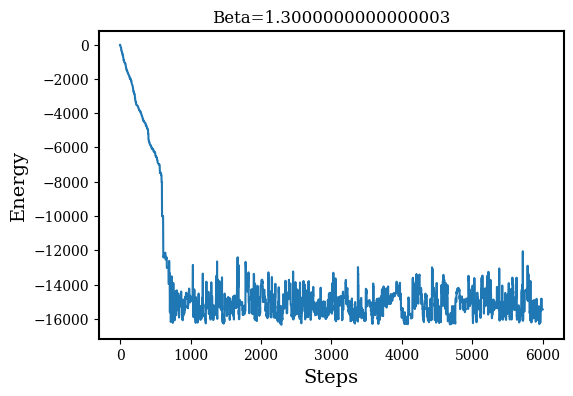

In [6]:
L = 64
beta = np.arange(1, 1.4, 0.1)

for b in beta: 
    lattice = XY2D(L=L, beta=b)
    while lattice.steps<max_steps:
        lattice.step()

    plt.figure(figsize=(6, 4))
    plt.plot(lattice.totalE)
    plt.ylabel('Energy', fontsize=14)
    plt.xlabel('Steps', fontsize=14)
    plt.title(f'Beta={lattice.beta}')
    plt.show()
    
    #mag.append(np.mean(lattice.susceptibility[-50:]))
    lattices128[b] = lattice

In [ ]:
# # adding coordinates:
# for i in range(lattice.L):
#     for j in range(lattice.L):
#         lattice.G.nodes[i, j]['coords'] = [i, j]
# 
# def get_euclidean_distance(graph, source, dest):
#     x1, y1 = graph.nodes[source]['coords']
#     x2, y2 = graph.nodes[dest]['coords']
#     return np.sqrt((x1-x2)**2 + (y1-y2)**2) 

In [ ]:
L = [16, 32, 64, 128]
max_steps = 5000

plt.figure(figsize=(6, 4))

for l in L: 
    lattice = XY2D(L=l, beta=5)
    
    while lattice.steps<max_steps:
        lattice.step()       
    plt.plot(lattice.totalE/max(lattice.totalE), label=f'L={l}')
    plt.ylabel('Energy', fontsize=14)
    plt.xlabel('Steps', fontsize=14)
    print('Done')
    #print(l, np.mean(lattice.susceptibility[-100:]) * lattice.L**2)
 
plt.title(fr'Dependence of Convergence Time on Lattice Size L; $\beta = 5$')
plt.legend(bbox_to_anchor=(1.01, 1.01)) 

Done
Done


In [ ]:
#%store -r lattices

In [155]:
C = []
T = []

for beta, lattice in lattices.items():
    E = np.mean(lattice.totalE[-100:])
    E2 = np.mean(np.array(lattice.totalE[-100:])**2)
    
    T.append(1/beta)
    C.append(beta**2 * (E2 - E**2) / lattice.L**2)
    print(beta, beta**2 * (E2 - E**2) / lattice.L**2)

1.0 14.561161328724026
0.9 22.28788833277738
0.8 34.50452053522921
0.7 0.4024045578731298
0.6 0.35120933075112104
0.5 0.13404178592823446
0.4 0.08172743711060287
0.3 0.047422837179835885
1.1 55.90883109163757
1.2 9.899697620284796
1.3 67.56838925832925
1.4 44.0503649111331
1.5 29.998221749508755
1.6 14.21126280234528
1.7 59.07549874205529
1.8 56.9534203019541
1.9 34.75929966595487


In [7]:
%store lattices128

Stored 'lattices128' (dict)


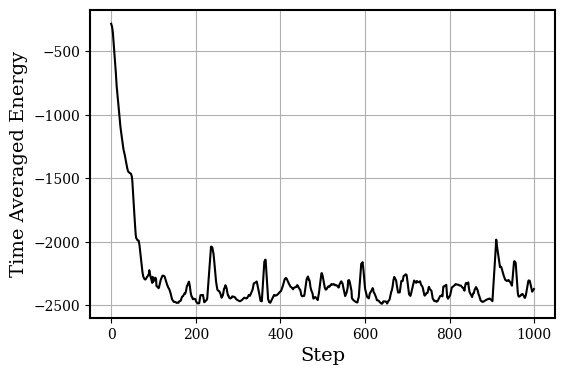

In [93]:
G = lattices[1.9]
plt.figure(figsize=(6,4))

plt.plot(np.arange(len(G.time_averagedE))[:1000], G.time_averagedE[:1000], color='black')
plt.xlabel(r'Step', fontsize=14)
plt.ylabel(r'Time Averaged Energy', fontsize=14)
plt.grid()

plt.savefig('energy_convergence.jpg', bbox_inches='tight')
# plt.title('')

In [ ]:
## 
def correlation_length(lattice):
    F = 0
    for i in range(lattice.L):
        for j in range(lattice.L):
            s1 = lattice.G.nodes[i, j]['s']
            for n in range(lattice.L):
                for m in range(lattice.L):
                    s2 = lattice.G.nodes[n, m]['s']
                    F += np.dot(s1, s2) * np.cos(2*np.pi*(s2[0] - s1[0])/L)

    chi = lattice.magnetization    
    #m = (chi[0]**2 + chi[1]**2)/lattice.L**2
    m =  np.mean(lattice.susceptibility[-100:])*lattice.L**2
    print(m, F/lattice.L**2)
    
    #print(m/(F/lattice.L**2), 1/(2*np.sin(np.pi/L)))
    return 1/(2*np.sin(np.pi/L)) * (m/(F/lattice.L**2) - 1)**(1/2)

In [1]:
mag = []
beta = []
corr = []

for b, lattice in lattices128.items():
    if b in beta: 
        continue
    beta.append(b)
    mag.append(np.mean(lattice.susceptibility[-100:]))
    
    corr.append(correlation_length(lattice))
    print('Done!')

NameError: name 'lattices128' is not defined

In [165]:
corr

[nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 0.16603132758041533,
 0.12949113455630934,
 0.3798823092149608,
 nan,
 nan,
 nan,
 nan,
 0.21039612001199545]

In [ ]:
plt.figure(figsize=(6,4))

plt.scatter(beta, mag, marker='x', color='black')
plt.xlabel(r'$\beta$', fontsize=14)
plt.ylabel(r'M', fontsize=14)
plt.grid()

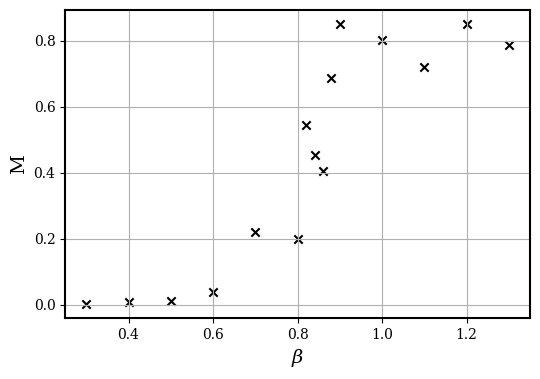

In [148]:
plt.figure(figsize=(6,4))

plt.scatter(beta, mag, marker='x', color='black')
plt.xlabel(r'$\beta$', fontsize=14)
plt.ylabel(r'M', fontsize=14)
plt.grid()
#plt.savefig('mag_vs_beta.jpg', bbox_inches='tight')
#plt.title('Average Magnetization')

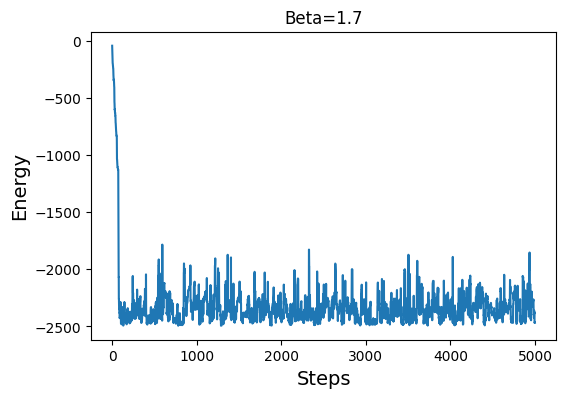

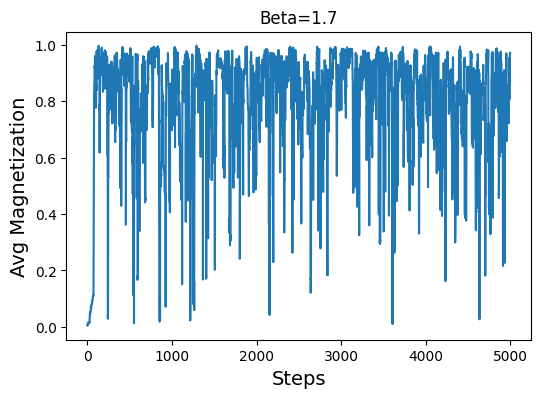

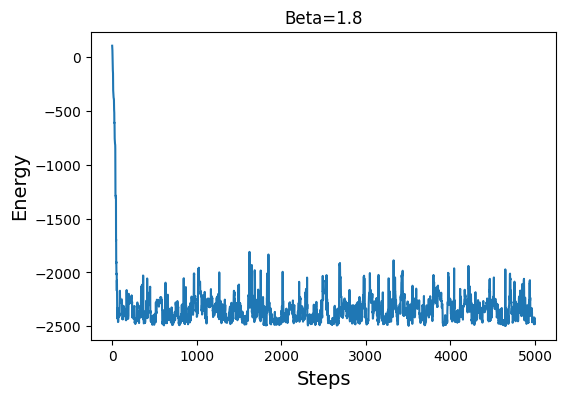

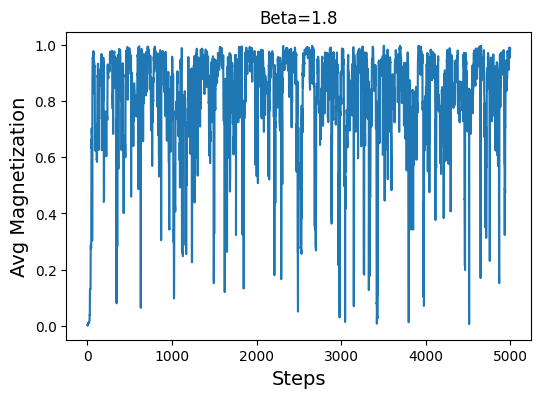

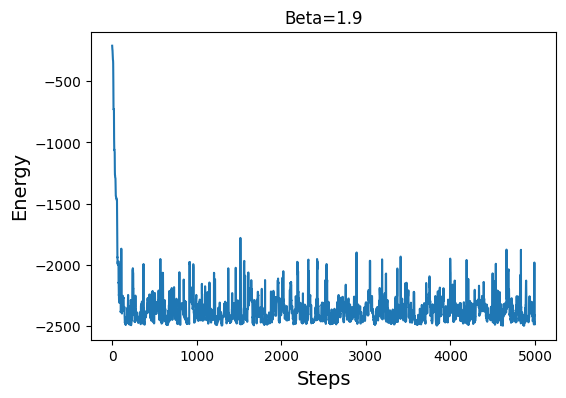

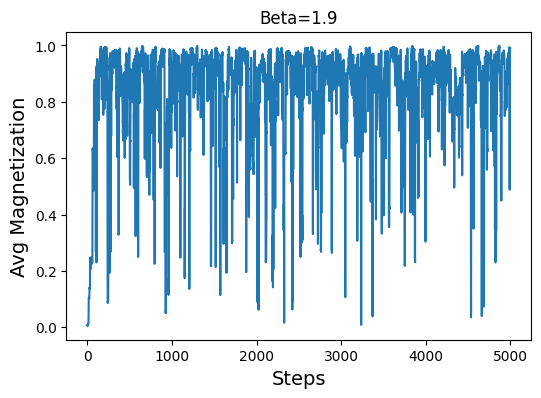

In [29]:
for b in [1.7, 1.8, 1.9]: 
    lattice = XY2D(L=L, beta=b)
    
    while lattice.steps<max_steps:
        lattice.step()

    plt.figure(figsize=(6, 4))
    plt.plot(lattice.totalE)
    plt.ylabel('Energy', fontsize=14)
    plt.xlabel('Steps', fontsize=14)
    plt.title(f'Beta={lattice.beta}')
    
    plt.figure(figsize=(6, 4))
    plt.plot(lattice.susceptibility)
    plt.ylabel('Avg Magnetization', fontsize=14)
    plt.xlabel('Steps', fontsize=14)
    plt.title(f'Beta={lattice.beta}')
    
    mag.append(np.mean(lattice.susceptibility[-50:]))
    lattices[b] = lattice

In [2]:
L = 50
beta = [10, 5, 2, 1.5, 1.2, 1.1, 0.9, 0.8, 0.6, 0.4, 0.2]
max_steps = 10000

for b in beta: 
    lattice = XY2D(L=L, beta=b)

    fig, ax = plt.subplots(1, 1)
    while not lattice.equilibrium and lattice.steps<max_steps:
        lattice.step()

    if not lattice.equilibrium:
        print(f'Beta={b} never reached equilibrium...')
    else:
        print(f'Beta={b} reached equilibrium at {lattice.steps_equilibrium} steps')
        lattice.show()

In [74]:
lattices[5]

KeyError: 5

Text(0.5, 1.0, 'Beta=1.0')

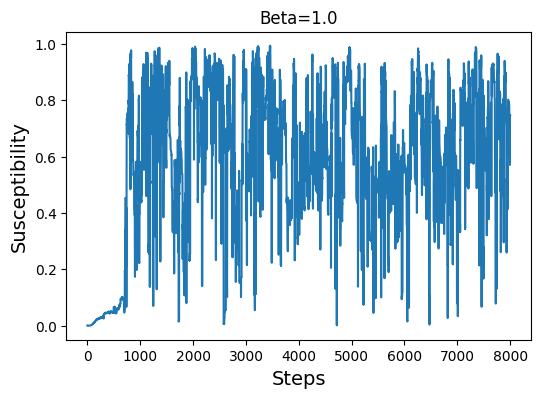

In [46]:
plt.figure(figsize=(6, 4))

plt.plot(lattice.susceptibility)
plt.ylabel('Susceptibility', fontsize=14)
plt.xlabel('Steps', fontsize=14)

plt.title(f'Beta={lattice.beta}')

In [47]:


np.mean(lattice.susceptibility[-20:])

0.672917631523721

In [30]:
m0 = [0, 0]
for node in iter(lattice.G.nodes):
    m0 += lattice.G.nodes[node]['s']
    
print(1/len(lattice.G) * np.sqrt(m0[0]**2 + m0[1]**2))

0.09897693655930831
